**Tutorial 2**

In [ ]:
# import packages

import numpy as np # arrays, array operations
from google.colab import files
import matplotlib.pyplot as plt # plot graphs
import random as rd #random
from sklearn.linear_model import LinearRegression #for linear regression model
import pandas as pd # working with data structures
import scipy.stats as stats
import io # import/output files


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

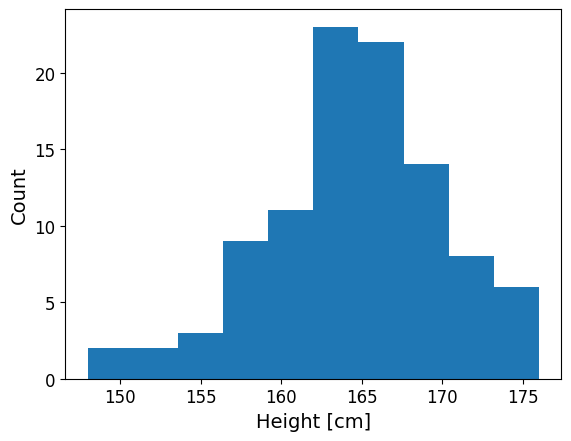

In [ ]:
#height simulation
heights = np.array([165, 161, 157, 165, 162, 164, 161, 169, 160, 174, 165, 166, 163, 160, 154, 150, 162, 171,
 166, 172, 157, 175, 158, 168, 163, 164, 164, 167, 161, 169, 170, 168, 166, 163, 163, 163,
 166, 159, 166, 164, 174, 173, 171, 158, 165, 172, 164, 155, 163, 169, 164, 161, 153, 167,
 160, 162, 159, 163, 175, 161, 167, 172, 160, 173, 163, 176, 148, 162, 165, 160, 170, 166,
 167, 166, 165, 157, 171, 170, 168, 162, 165, 169, 165, 166, 162, 165, 157, 175, 169, 156,
 157, 164, 169, 169, 162, 161, 152, 168, 167, 163])


plt.hist(heights, bins = 10)
plt.xlabel('Height [cm]', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig("data.png", bbox_inches='tight')
files.download("data.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

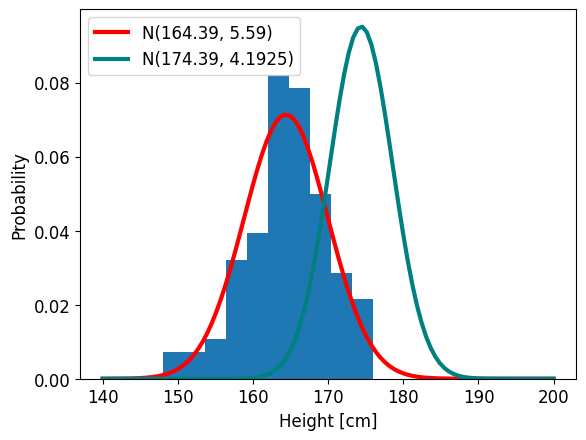

In [ ]:
#models
plt.hist(heights, density = True, bins = 10)

pdf_f = stats.norm.pdf(np.linspace(140, 200, 100), np.mean(heights), np.std(heights))
plt.plot(np.linspace(140, 200, 100), pdf_f, color = 'red', lw = 3, label = f'N({round(np.mean(heights), 2)}, {round(np.std(heights), 2)})')

pdf_f2 = stats.norm.pdf(np.linspace(140, 200, 100), np.mean(heights) + 10, np.std(heights)*0.75)
plt.plot(np.linspace(140, 200, 100), pdf_f2, color = 'teal', lw = 3, label = f'N({round(np.mean(heights), 2) + 10}, {round(np.std(heights), 2)*0.75})')

plt.ylabel('Probability', fontsize = 12)
plt.xlabel('Height [cm]', fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize = 12)

plt.savefig("models.png", bbox_inches='tight')
files.download("models.png")

In [ ]:
#define function to add noise to simulated data
def noise(k, noise_factor):
   return k + rd.random()*noise_factor

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

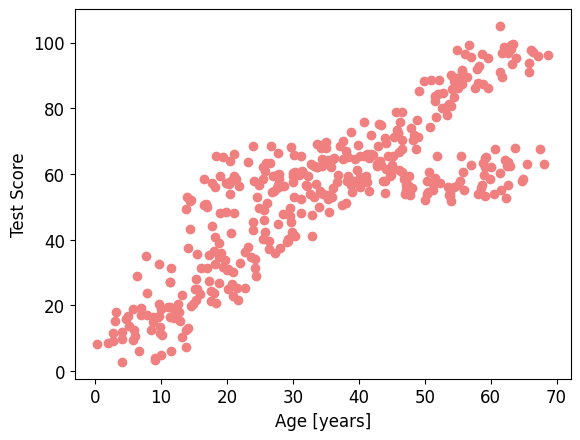

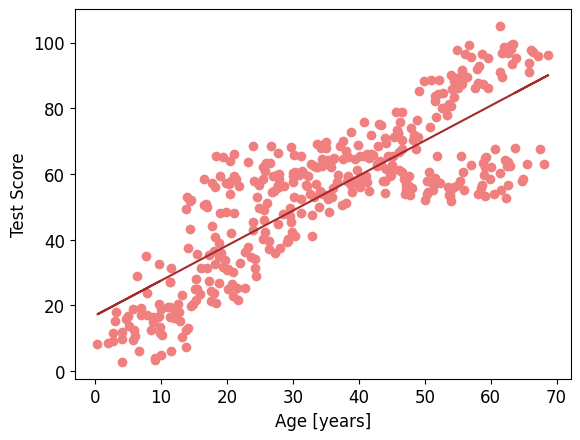

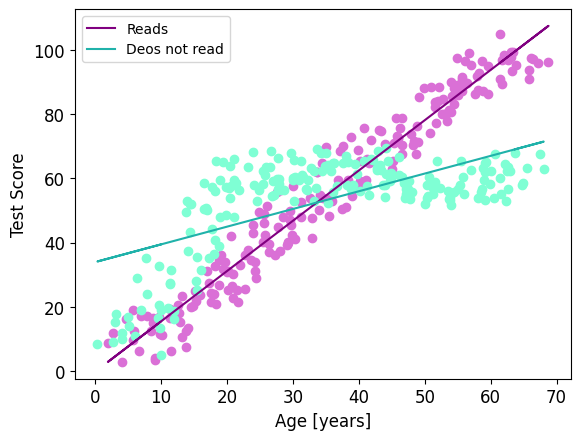

In [ ]:
#create simulated data to examine the relation between age and grade on vocubulary test
#reads
Ages1 = np.linspace(0, 60, 200)
Scores1 = np.linspace(0, 100, 200)


Ages11 = np.reshape(np.vectorize(noise)(Ages1, 10), (Ages1.shape[0], 1))
Scores11 = np.reshape(np.vectorize(noise)(Scores1, 12), (Scores1.shape[0], 1))

#correcting scores above 100
Scores11[np.flatnonzero(Scores11 > 100)] = Scores11[np.flatnonzero(Scores11 > 100)] - np.vectorize(noise)(5*np.ones_like(Scores11[np.flatnonzero(Scores11 > 100)]), 10)

#regression model for this data
regr_model = LinearRegression().fit(Ages11, Scores11)
b0_1 = regr_model.intercept_
b1_1 = regr_model.coef_

#doesn't read
Scores2 = np.concatenate((np.linspace(0, 50, 50), np.vectorize(noise)(50*np.ones(150,), 6)))
Scores22 = np.reshape(np.vectorize(noise)(Scores2, 15), (Scores2.shape[0], 1))
Ages22 = np.reshape(np.vectorize(noise)(Ages1, 10), (Ages1.shape[0], 1))

#regression model for this data
regr_model = LinearRegression().fit(Ages22, Scores22)
b0_2 = regr_model.intercept_
b1_2 = regr_model.coef_

#all data together
AllScores = np.concatenate((Scores11, Scores22))
AllAges = np.concatenate((Ages11, Ages22))
regr_model = LinearRegression().fit(AllAges, AllScores)
b0 = regr_model.intercept_
b1 = regr_model.coef_

plt.figure()
plt.scatter(AllAges, AllScores, color = 'lightcoral')
plt.xlabel('Age [years]', fontsize = 12)
plt.ylabel('Test Score', fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("ScatterData.png", bbox_inches='tight')
files.download("ScatterData.png")

plt.figure()
plt.scatter(AllAges, AllScores, color = 'lightcoral')
plt.plot(AllAges, b0 + b1*AllAges, color = 'brown')
plt.xlabel('Age [years]', fontsize = 12)
plt.ylabel('Test Score', fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("AllData.png", bbox_inches='tight')
files.download("AllData.png")

plt.figure()
plt.scatter(Ages11, Scores11, color = 'orchid')
plt.plot(Ages11, b0_1 + b1_1*Ages11, color = 'purple', label = 'Reads')

plt.scatter(Ages22, Scores22, color = 'aquamarine')
plt.plot(Ages22, b0_2 + b1_2*Ages22, color = 'lightseagreen', label = 'Deos not read')

plt.legend()
plt.xlabel('Age [years]', fontsize = 12)
plt.ylabel('Test Score', fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("SeperatedData.png", bbox_inches='tight')
files.download("SeperatedData.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

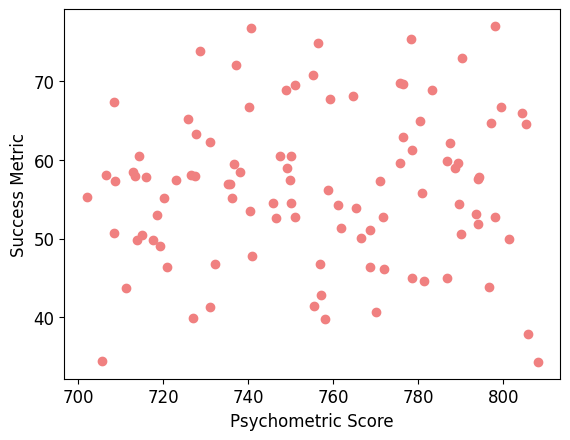

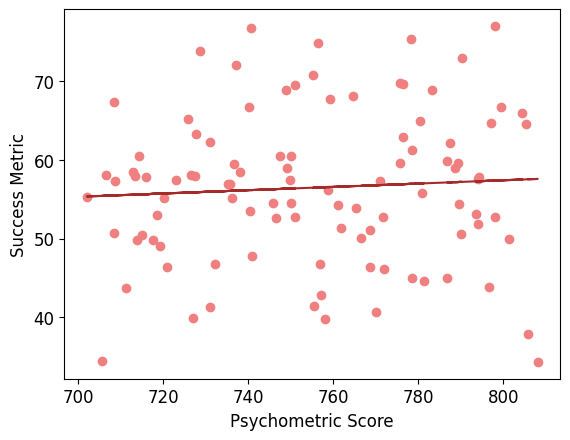

In [ ]:
#pychometric scores and doctor simulated data
psychometric = np.linspace(700, 800, 100)
psychometric =  np.reshape(np.vectorize(noise)(psychometric, 10), (psychometric.shape[0], 1))

success = np.reshape(np.vectorize(noise)(50+np.random.normal(0, 10, psychometric.shape), 10), (psychometric.shape[0], 1))

regr_model = LinearRegression().fit(psychometric, success)
b0 = regr_model.intercept_
b1 = regr_model.coef_

plt.figure()
plt.scatter(psychometric, success, color = 'lightcoral')
plt.xlabel('Psychometric Score', fontsize = 12)
plt.ylabel('Success Metric', fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("ScatterData.png", bbox_inches='tight')
files.download("ScatterData.png")

plt.figure()
plt.scatter(psychometric, success, color = 'lightcoral')
plt.plot(psychometric, b0 + b1*psychometric, color = 'brown')
plt.xlabel('Psychometric Score', fontsize = 12)
plt.ylabel('Success Metric', fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("Regression.png", bbox_inches='tight')
files.download("Regression.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

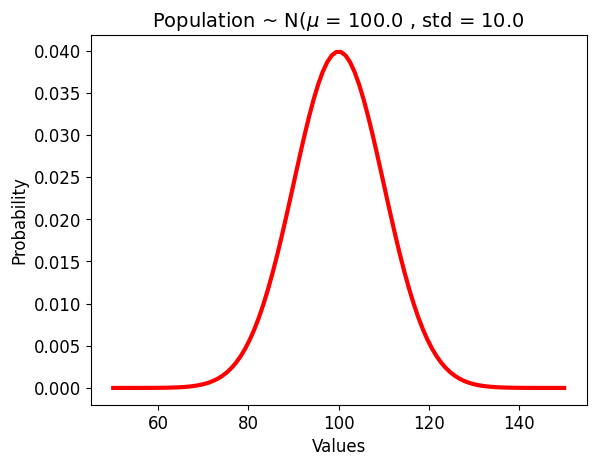

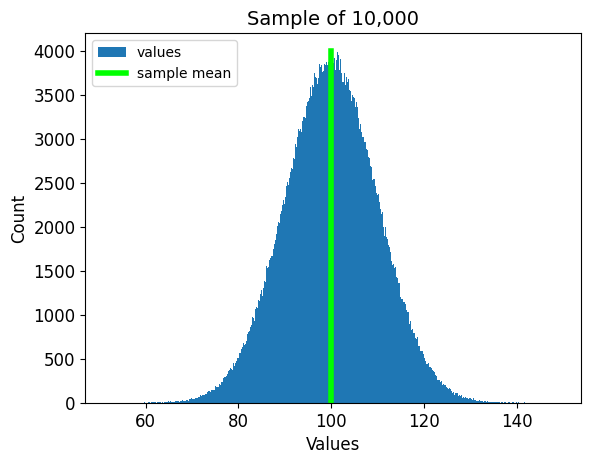

In [ ]:
# generate population - normal

sample = np.random.normal(100,10,size = (1000000,1))
sample_mean = np.mean(sample)
sample_sd = np.std(sample)

pdf = stats.norm.pdf(np.linspace(50, 150, 100), 100, 10)
plt.plot(np.linspace(50, 150, 100), pdf, color = 'red', lw = 3,
         label = 'normal distribution fit')
plt.title(f'Population ~ N($\mu$ = {round(sample_mean,2)} , std = {round(sample_sd,2)}', fontsize = 14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("Population.png", bbox_inches='tight')
files.download("Population.png")

plt.figure()
plt.hist(sample, bins = 1000, label = 'values')
plt.plot([sample_mean, sample_mean] , [0, 4000], color = 'lime', linewidth = 4,
           label = 'sample mean')

plt.title(f'Sample of 10,000', fontsize = 14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(loc = 'upper left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("sample.png", bbox_inches='tight')
files.download("sample.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

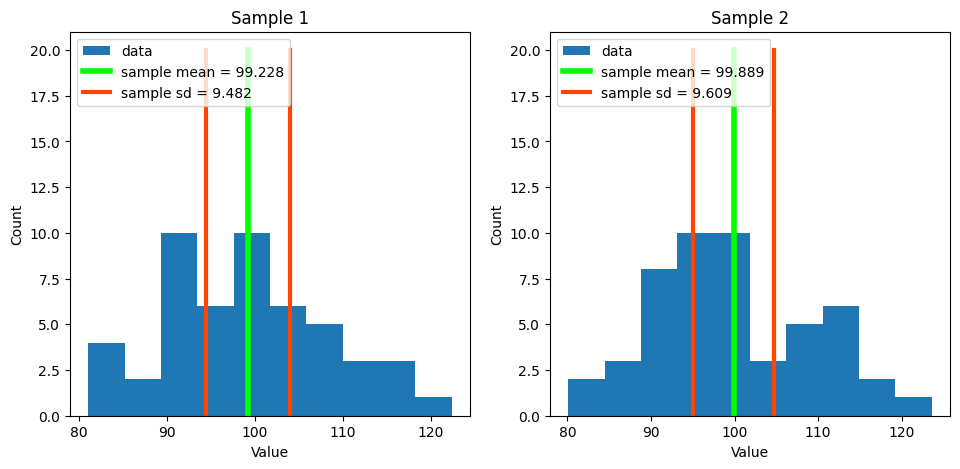

In [ ]:
# two samples from population

sample1 = np.random.normal(100,10,size = (50,1))
sample2 = np.random.normal(100,10,size = (50,1))

sample1_mean = np.mean(sample1)
sample2_mean = np.mean(sample2)
sample1_sd = np.std(sample1)
sample2_sd = np.std(sample2)


fig, ax, = plt.subplots(1,2)
ax[0].hist( sample1, label = 'data')
ax[1].hist(sample2, label = 'data')

ax[0].plot([sample1_mean, sample1_mean] , [0, 20], color = 'lime', linewidth = 4,
           label = 'sample mean = '+ str(round(sample1_mean,3)))
ax[0].plot([[sample1_mean-0.5*sample1_sd, sample1_mean+0.5*sample1_sd], [sample1_mean-0.5*sample1_sd, sample1_mean+0.5*sample1_sd]] ,
           [0, 20], color = 'orangered', linewidth = 3,
           label = 'sample sd = '+ str(round(sample1_sd,3)))

ax[1].plot([sample2_mean, sample2_mean] , [0, 20], color = 'lime',linewidth = 4,
           label = 'sample mean = '+ str(round(sample2_mean,3)))
ax[1].plot(([sample2_mean-0.5*sample2_sd, sample2_mean+0.5*sample2_sd], [sample2_mean-0.5*sample2_sd, sample2_mean+0.5*sample2_sd]) ,
           [0, 20], color = 'orangered', linewidth = 3,
           label = 'sample sd = '+ str(round(sample2_sd,3)))

ax[0].set_title('Sample 1')
ax[1].set_title('Sample 2')

ax[0].set_xlabel('Value')
ax[1].set_xlabel('Value')

ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')

handles0, labels0 = ax[0].get_legend_handles_labels()
handles1, labels1 = ax[1].get_legend_handles_labels()

order = [0,1,2]
ax[0].legend([handles0[idx] for idx in order],[labels0[idx] for idx in order],loc='upper left')
ax[1].legend([handles1[idx] for idx in order],[labels1[idx] for idx in order],loc='upper left')

fig.subplots_adjust(bottom=0.1, right=1.5, top=0.9)

plt.savefig("Samples2.png", bbox_inches='tight')
files.download("Samples2.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

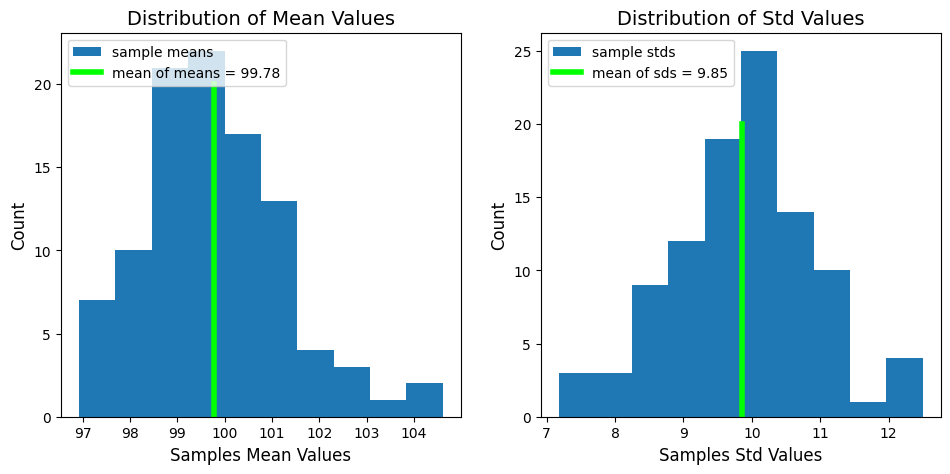

In [ ]:
# 100 samples

samplen = np.random.normal(100,10,size = (50,100))

meann =  np.mean(samplen, axis = 0)
sdn =  np.std(samplen, axis = 0)

mean_of_means = np.mean(meann)
mean_of_sds = np.mean(sdn)

fig, ax, = plt.subplots(1,2)
ax[0].hist( meann, label = 'sample means')
ax[1].hist(sdn,  label = 'sample stds')

ax[0].plot([mean_of_means, mean_of_means] , [0, 20], color = 'lime', linewidth = 4,
           label = f'mean of means = {round(mean_of_means, 2)}')

ax[1].plot([mean_of_sds, mean_of_sds] , [0, 20], color = 'lime',linewidth = 4,
           label = f'mean of sds = {round(mean_of_sds, 2)}')

ax[0].set_title('Distribution of Mean Values', fontsize = 14)
ax[1].set_title('Distribution of Std Values', fontsize = 14)
ax[0].set_xlabel('Samples Mean Values', fontsize = 12)
ax[1].set_xlabel('Samples Std Values', fontsize = 12)
ax[0].set_ylabel('Count', fontsize = 12)
ax[1].set_ylabel('Count', fontsize = 12)

handles0, labels0 = ax[0].get_legend_handles_labels()
handles1, labels1 = ax[1].get_legend_handles_labels()

order = [0,1]
ax[0].legend([handles0[idx] for idx in order],[labels0[idx] for idx in order],loc='upper left')
ax[1].legend([handles1[idx] for idx in order],[labels1[idx] for idx in order],loc='upper left')

fig.subplots_adjust(bottom=0.1, right=1.5, top=0.9)

plt.savefig("Samples100.png", bbox_inches='tight')
files.download("Samples100.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

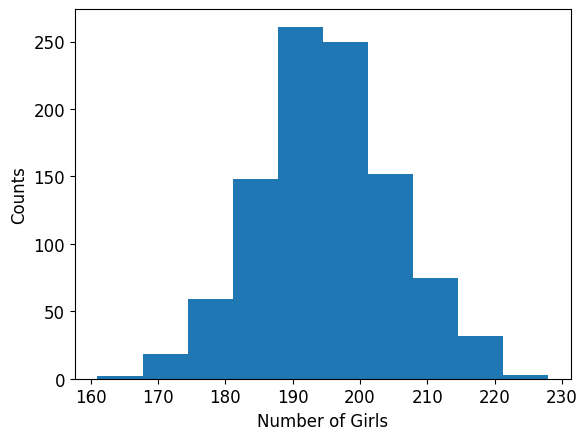

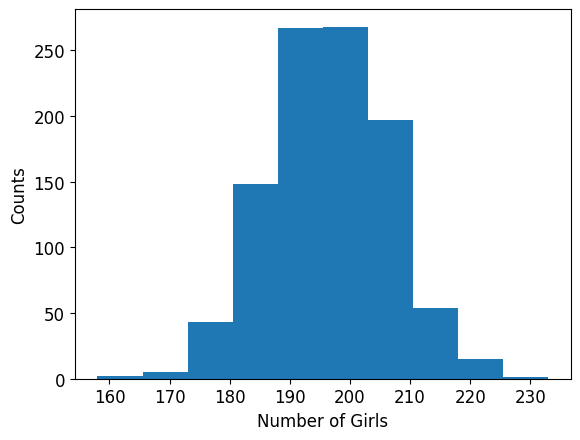

In [ ]:

#girls born simulation
girls = np.random.binomial(400, 0.488, 1000)
plt.hist(girls)
plt.xlabel('Number of Girls', fontsize = 12)
plt.ylabel('Counts', fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("girlsborn.png", bbox_inches='tight')
files.download("girlsborn.png")

#brith types (twins and single births)
birth_types = np.array([0, 1, 2]) #fraternal twins, identical twins, single births
NumGirls = np.zeros((1000, 1))
for i in range(1000): #1000 repetitions
  #400 births in each simulation
  births = np.random.choice(birth_types, 400, replace = True, p = np.array([1/125, 1/300, 1 - 1/125 - 1/300]))
  girlboy = np.zeros((births.shape[0], 1)) #1 = girl, 0 = boy
  for j in range(births.shape[0]):
    if births[j] == 0: #fraternal twins
      girlboy[j] = np.random.binomial(2, 0.495, 1) #there are two born
    if births[j] == 1: #identical twins
      girlboy[j] = 2*np.random.binomial(1, 0.495, 1) #either both are twins or neither are
    else:
      girlboy[j] = np.random.binomial(1, 0.488, 1)
  NumGirls[i] = np.sum(girlboy)

plt.figure()
plt.hist(NumGirls)
plt.xlabel('Number of Girls', fontsize = 12)
plt.ylabel('Counts', fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("girlsborn_birthtypes.png", bbox_inches='tight')
files.download("girlsborn_birthtypes.png")

In [ ]:
# Height weight example
#upload and read from PC/Drive
# after running press 'Choose File'
from google.colab import files # upload and save files

uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['Davis.csv']))

for col in data.columns: # see names of the columns in a loop
    print(col)

print(data)

Saving Davis.csv to Davis.csv
subject
sex
weight
height
repwt
repht
     subject sex  weight  height  repwt  repht
0          1   M      77     182   77.0  180.0
1          2   F      58     161   51.0  159.0
2          3   F      53     161   54.0  158.0
3          4   M      68     177   70.0  175.0
4          5   F      59     157   59.0  155.0
..       ...  ..     ...     ...    ...    ...
195      196   M      74     175   71.0  175.0
196      197   M      83     180   80.0  180.0
197      198   M      81     175    NaN    NaN
198      199   M      90     181   91.0  178.0
199      200   M      79     177   81.0  178.0

[200 rows x 6 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

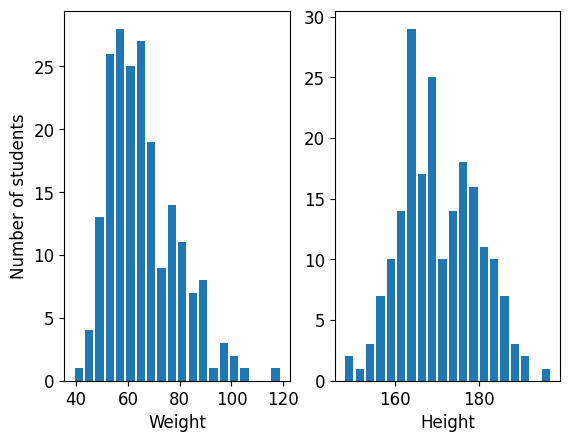

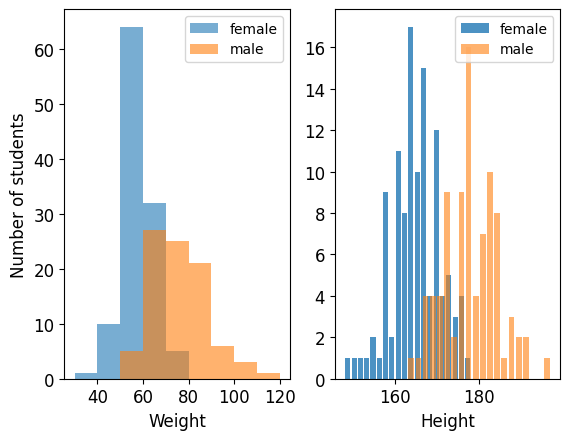

In [ ]:
# plot data

weight = data.weight
height = data.height
num_bins, bin_width = 20, 0.8

plt.subplot(1, 2, 1)
plt.hist(weight, bins = num_bins, rwidth = bin_width)
plt.xlabel('Weight', fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Number of students', fontsize = 12)

plt.subplot(1, 2, 2)
plt.hist(height, bins = num_bins, rwidth = bin_width)
plt.xlabel('Height', fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig("height_weight.png", bbox_inches='tight')
files.download("height_weight.png")

plt.figure()

weight_f = data.weight[data.sex == 'F']
weight_m = data.weight[data.sex == 'M']

height_f = height[data.sex == 'F']
height_m = height[data.sex == 'M']

bin_edges = np.arange(30,130,10)
alpha, histtype = 0.6, 'stepfilled'

plt.subplot(1, 2, 1)
plt.hist(weight_f, bins = bin_edges, rwidth = bin_width, label = 'female', alpha = alpha, histtype=histtype)
plt.hist(weight_m, bins = bin_edges, rwidth = bin_width, label = 'male', alpha = alpha, histtype=histtype)
plt.xlabel('Weight', fontsize = 12)
plt.ylabel('Number of students', fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.hist(height_f, bins = 20, rwidth = 0.8, label = 'female', alpha = 0.8)
plt.hist(height_m, bins = 20, rwidth = 0.8, label = 'male', alpha = 0.6)
plt.xlabel('Height', fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right')

plt.savefig("height_weight_sep.png", bbox_inches='tight')
files.download("height_weight_sep.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

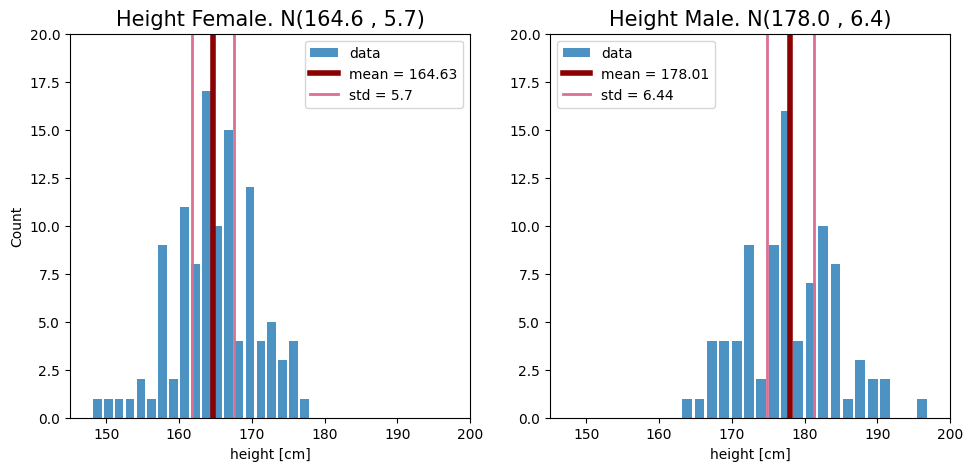

In [ ]:
# height data + mean + sd

height_f_mean = height_f.mean()
height_m_mean = height_m.mean()

height_f_sd = height_f.std()
height_m_sd = height_m.std()

bin_num, bin_width, label_data, transp = 20, 0.8, 'data', 0.8

range_y, range_x, mean_c, mean_lw = [0, 20],[145, 200],'darkred', 4
sd_c, sd_lw, fs = 'palevioletred', 2, 15

fig , ax = plt.subplots(1, 2)
ax[0].hist(height_f, bins = bin_num, rwidth = bin_width, label = label_data, alpha = transp)
ax[1].hist(height_m, bins = bin_num, rwidth = bin_width, label = label_data, alpha = transp)

ax[0].plot( [height_f_mean, height_f_mean] , range_y, color = mean_c, linewidth = mean_lw,
           label = 'mean = '+ str(round(height_f_mean,2)))
ax[1].plot( [height_m_mean, height_m_mean] , range_y, color = mean_c, linewidth = mean_lw,
           label = 'mean = '+ str(round(height_m_mean,2)))

ax[0].plot( [height_f_mean-0.5*height_f_sd, height_f_mean-0.5*height_f_sd] , range_y, color = sd_c,
           linewidth = sd_lw, label = 'std = '+ str(round(height_f_sd,2)))
ax[1].plot( [height_m_mean-0.5*height_m_sd, height_m_mean-0.5*height_m_sd] , range_y, color = sd_c,
           linewidth = sd_lw, label = 'std = '+ str(round(height_m_sd,2)))

ax[0].plot( [height_f_mean+0.5*height_f_sd, height_f_mean+0.5*height_f_sd] ,range_y, color = sd_c,
           linewidth = sd_lw)
ax[1].plot( [height_m_mean+0.5*height_m_sd, height_m_mean+0.5*height_m_sd] , range_y, color = sd_c,
           linewidth = sd_lw)

ax[0].set_ylim(range_y)
ax[1].set_ylim(range_y)
ax[0].set_xlim(range_x)
ax[1].set_xlim(range_x)

ax[0].set_ylabel('Count')
ax[0].set_xlabel('height [cm]')
ax[1].set_xlabel('height [cm]')
ax[0].set_title('Height Female. N('+str(round(height_f_mean,1))+' , '+str(round(height_f_sd,1))+')', fontsize = fs)
ax[1].set_title('Height Male. N('+str(round(height_m_mean,1))+' , '+str(round(height_m_sd,1))+')', fontsize = fs)

order = [0,1,2]
handles0, labels0 = ax[0].get_legend_handles_labels()
handles1, labels1 = ax[1].get_legend_handles_labels()

ax[0].legend([handles0[idx] for idx in order],[labels0[idx] for idx in order],loc='upper right')
ax[1].legend([handles1[idx] for idx in order],[labels1[idx] for idx in order],loc='upper left')

plt.subplots_adjust(bottom=0.1, right=1.5, top=0.9)

plt.savefig("height_separate.png", bbox_inches='tight')
files.download("height_separate.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

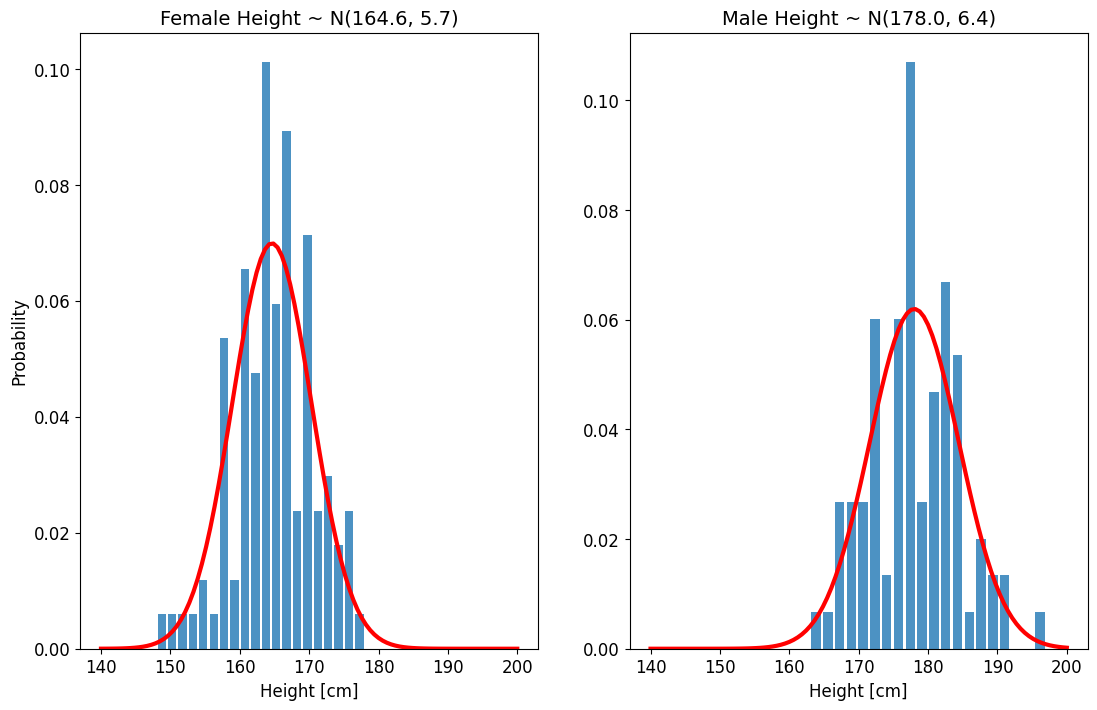

In [ ]:
# plot histogram + fit
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.hist(height_f, bins = bin_num, rwidth = bin_width, alpha = transp, density = True)

pdf_f = stats.norm.pdf(np.linspace(140, 200, 100), height_f_mean, height_f_sd)
plt.plot(np.linspace(140, 200, 100), pdf_f, color = 'red', lw = 3)
plt.ylabel('Probability', fontsize = 12)
plt.xlabel('Height [cm]', fontsize = 12)
plt.title(f'Female Height ~ N({round(height_f_mean,1)}, {round(height_f_sd,1)})', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1, 2, 2)
plt.hist(height_m, bins = bin_num, rwidth = bin_width, alpha = transp, density = True)
pdf_m = stats.norm.pdf(np.linspace(140, 200, 100), height_m_mean, height_m_sd)
plt.plot(np.linspace(140, 200, 100), pdf_m, color = 'red', lw = 3)
plt.xlabel('Height [cm]', fontsize = 12)
plt.title(f'Male Height ~ N({round(height_m_mean,1)}, {round(height_m_sd,1)})', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

fig.set_size_inches(13, 8)


plt.savefig("height_fit.png", bbox_inches='tight')
files.download("height_fit.png")
